In [53]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O

from ggplot import *
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn

In [66]:
df = pd.read_csv('../data/breast_cancer_wisconsin.csv')
df['diagnosis'].replace(['M','B'], [1,0], inplace=True)
print (df.describe(include='all'))


                 id   diagnosis  radius_mean  texture_mean  perimeter_mean  \
count  5.690000e+02  569.000000   569.000000    569.000000      569.000000   
mean   3.037183e+07    0.372583    14.127292     19.289649       91.969033   
std    1.250206e+08    0.483918     3.524049      4.301036       24.298981   
min    8.670000e+03    0.000000     6.981000      9.710000       43.790000   
25%    8.692180e+05    0.000000    11.700000     16.170000       75.170000   
50%    9.060240e+05    0.000000    13.370000     18.840000       86.240000   
75%    8.813129e+06    1.000000    15.780000     21.800000      104.100000   
max    9.113205e+08    1.000000    28.110000     39.280000      188.500000   

         area_mean  smoothness_mean  compactness_mean  concavity_mean  \
count   569.000000       569.000000        569.000000      569.000000   
mean    654.889104         0.096360          0.104341        0.088799   
std     351.914129         0.014064          0.052813        0.079720   
min  

<h2>Exploratory Data Analysis</h2>

In [67]:
from sklearn.cross_validation import train_test_split
import matplotlib as mpl
import seaborn as sns

train,test = train_test_split(df,test_size=0.2,random_state=999)

In [79]:
con = df.columns.values[1:-1]
con_variables = train[con]
print con
#print con_variables

['diagnosis' 'radius_mean' 'texture_mean' 'perimeter_mean' 'area_mean'
 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave points_mean' 'symmetry_mean' 'fractal_dimension_mean' 'radius_se'
 'texture_se' 'perimeter_se' 'area_se' 'smoothness_se' 'compactness_se'
 'concavity_se' 'concave points_se' 'symmetry_se' 'fractal_dimension_se'
 'radius_worst' 'texture_worst' 'perimeter_worst' 'area_worst'
 'smoothness_worst' 'compactness_worst' 'concavity_worst'
 'concave points_worst' 'symmetry_worst' 'fractal_dimension_worst']


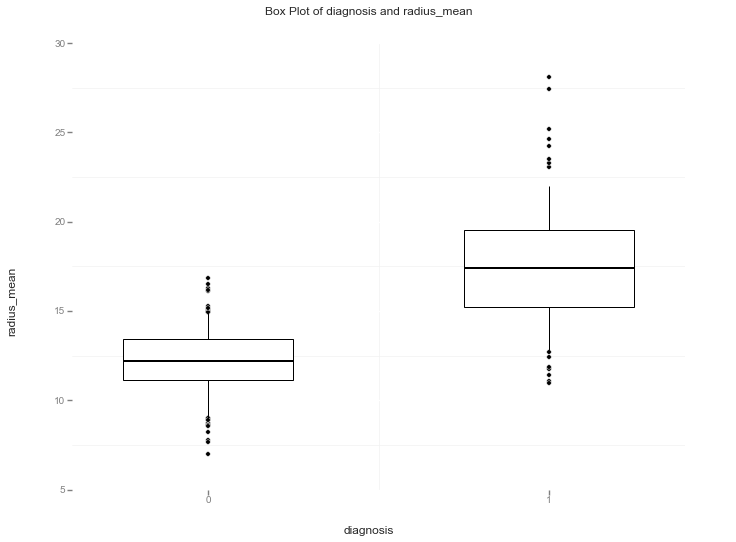

<ggplot: (15211864)>


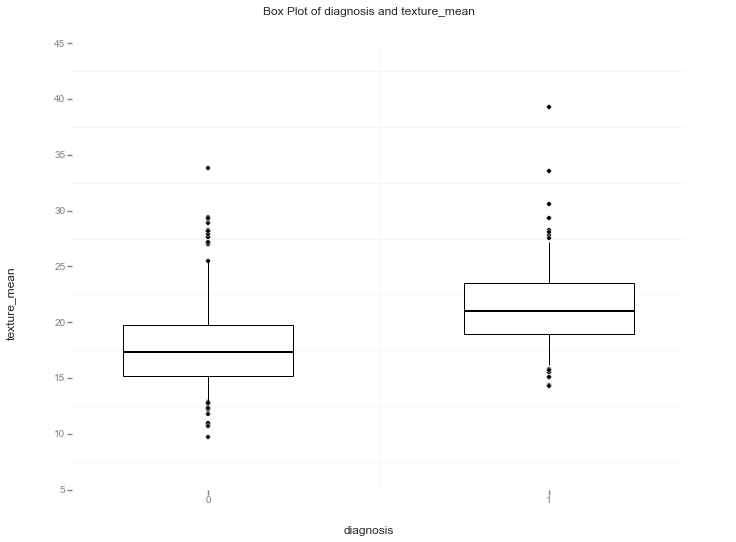

<ggplot: (15668158)>


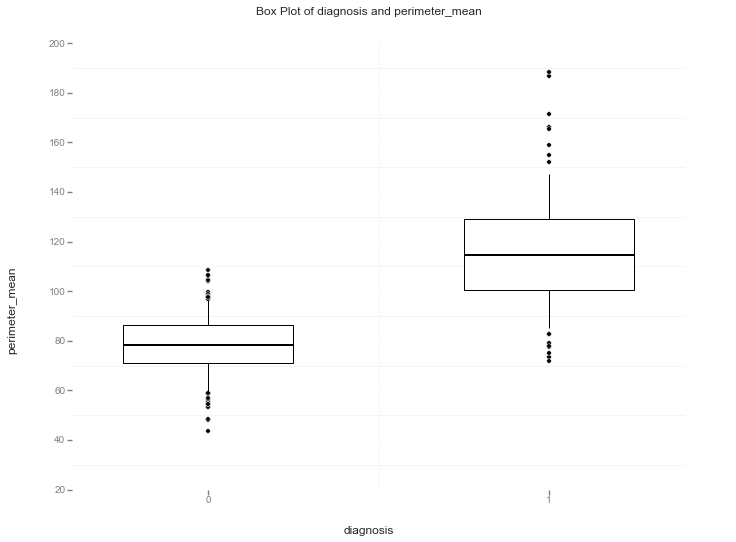

<ggplot: (17825291)>


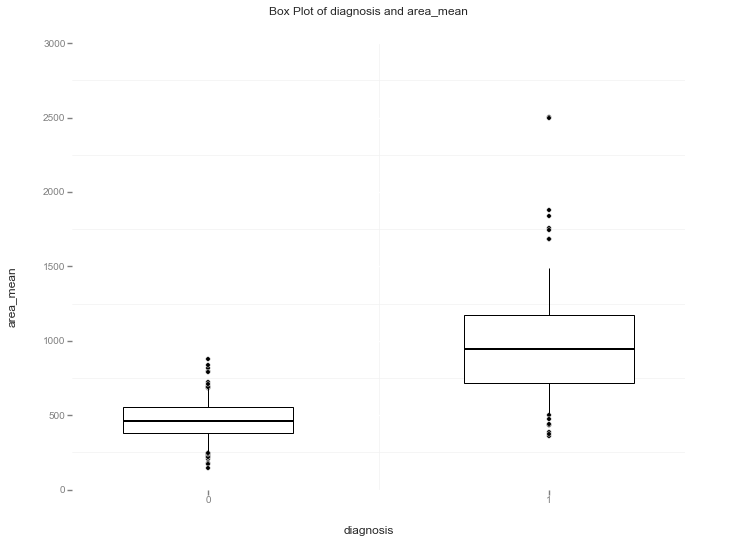

<ggplot: (17419734)>


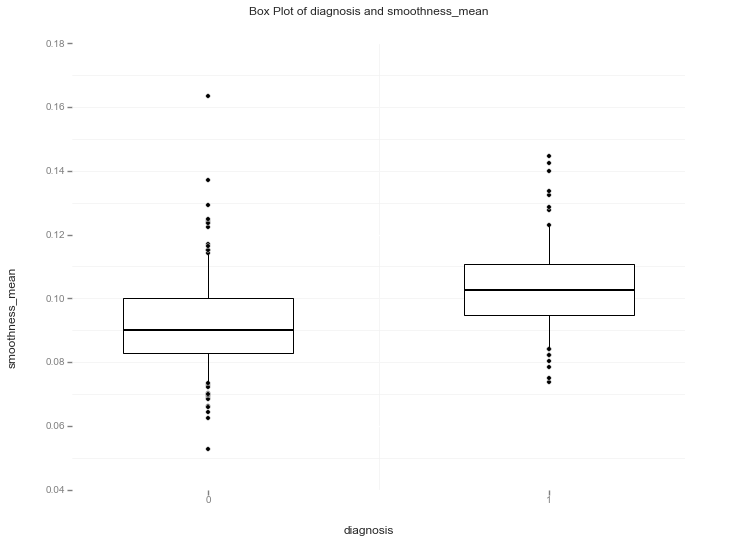

<ggplot: (13146740)>


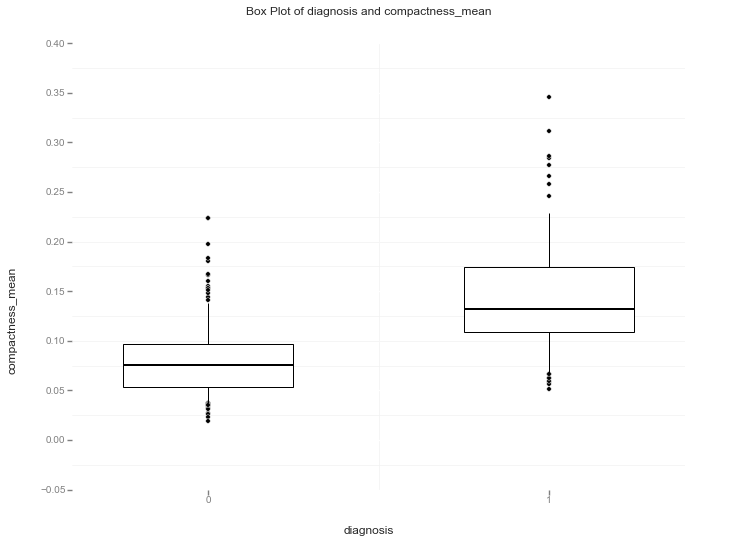

<ggplot: (17321585)>


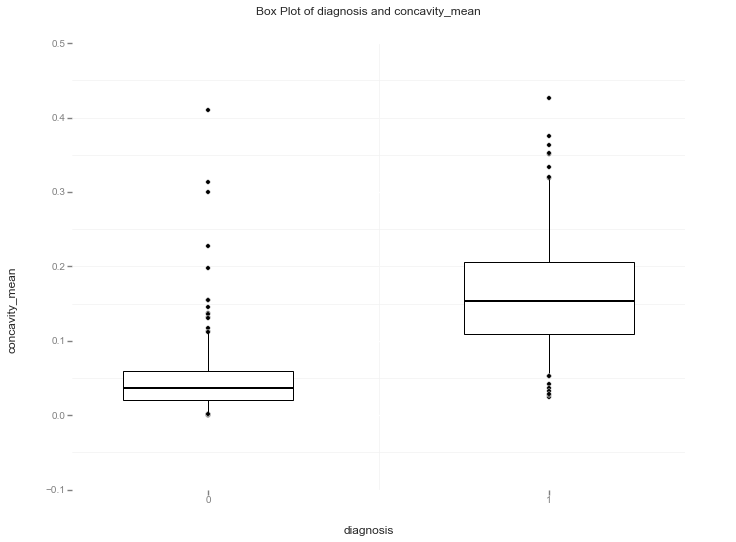

<ggplot: (13177422)>


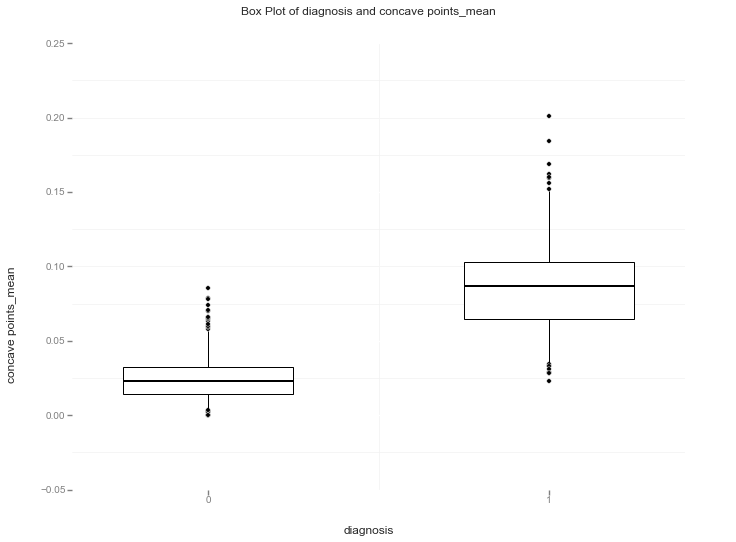

<ggplot: (17521987)>


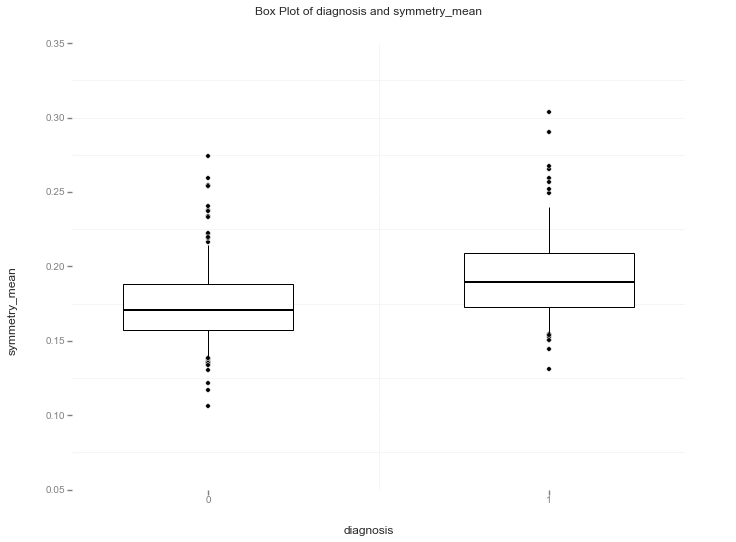

<ggplot: (17150486)>


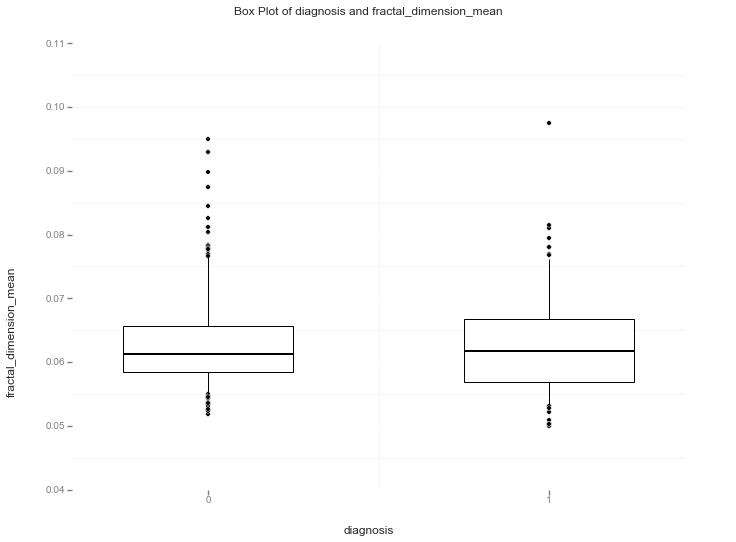

<ggplot: (18010961)>


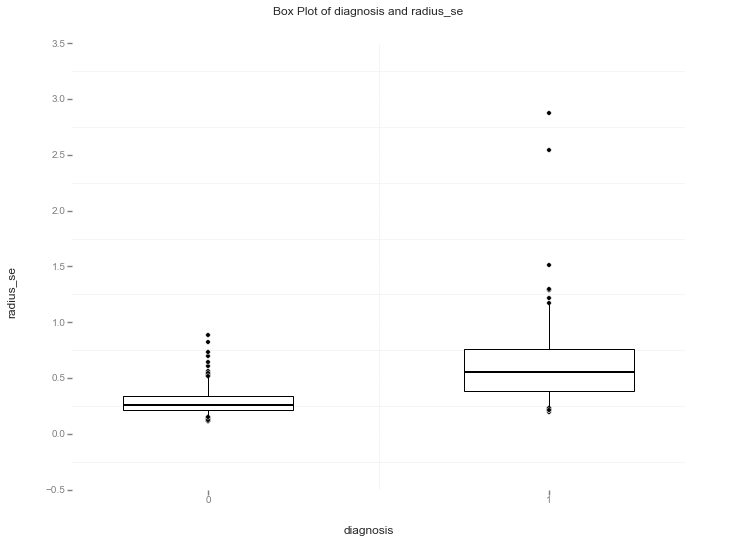

<ggplot: (12800804)>


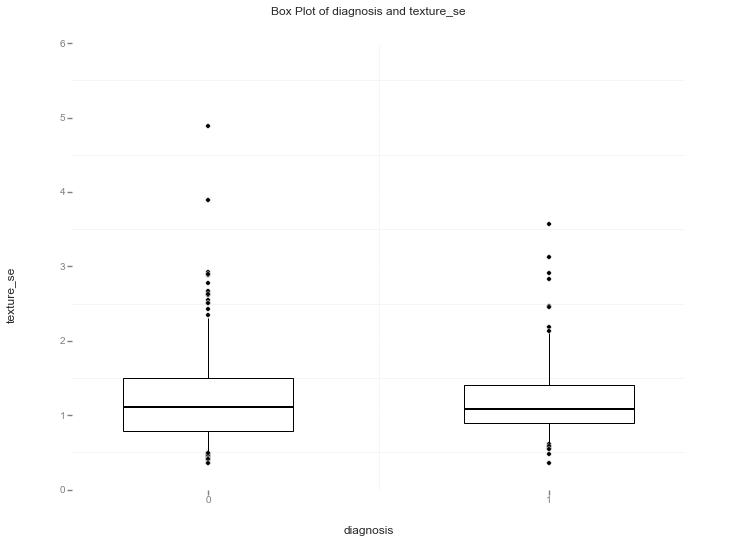

<ggplot: (15746326)>


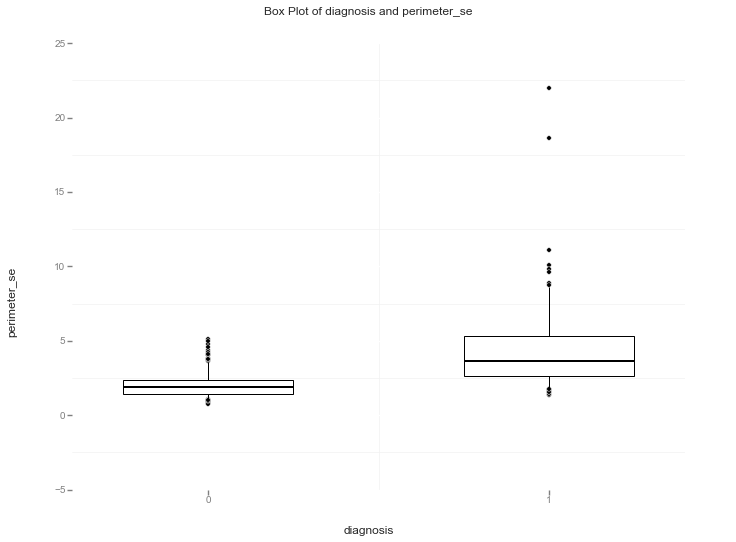

<ggplot: (15736503)>


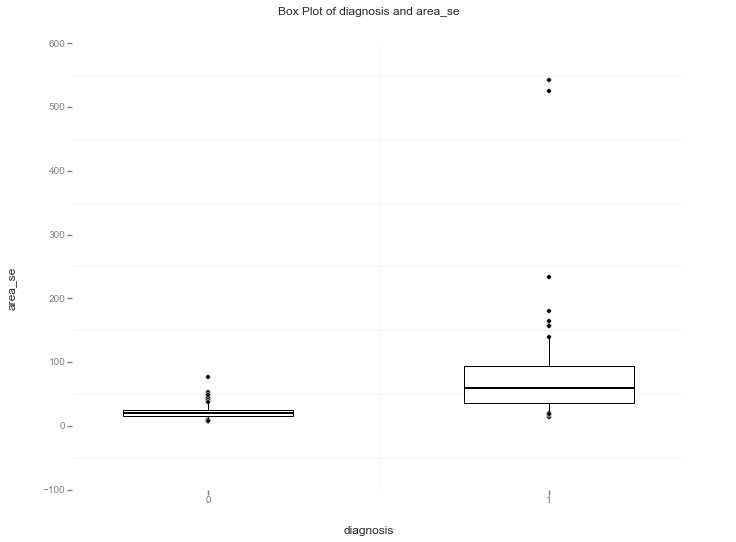

<ggplot: (17188044)>


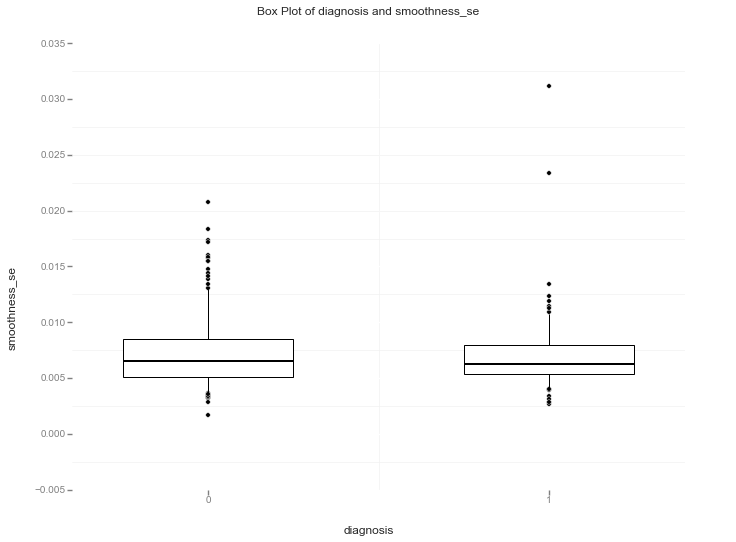

<ggplot: (17291980)>


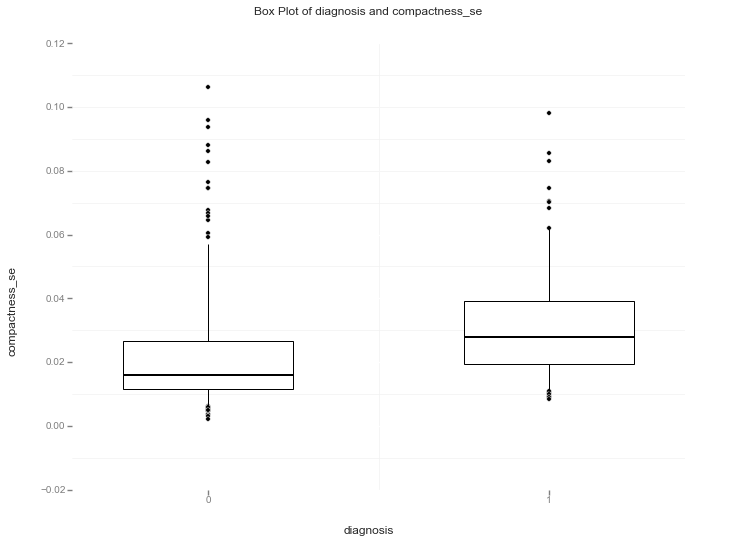

<ggplot: (17472642)>


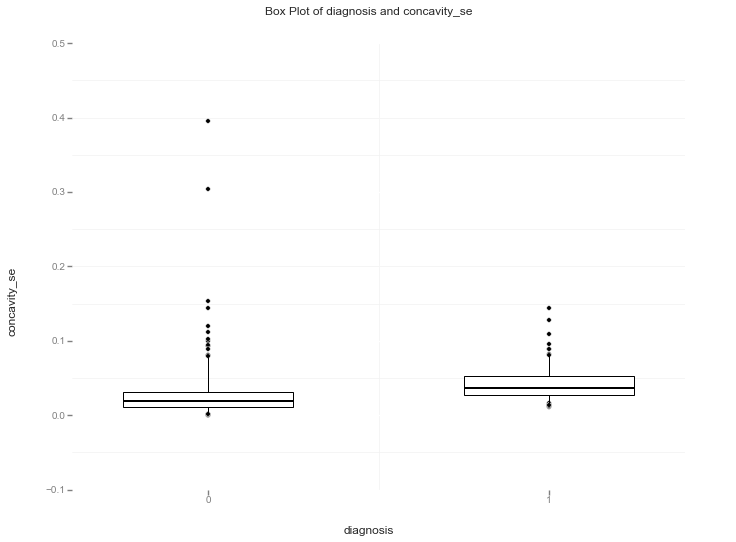

<ggplot: (17415817)>


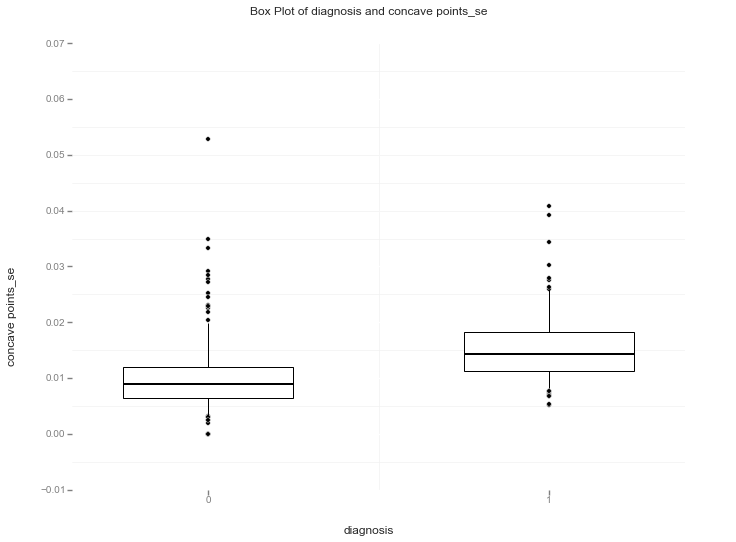

<ggplot: (17792730)>


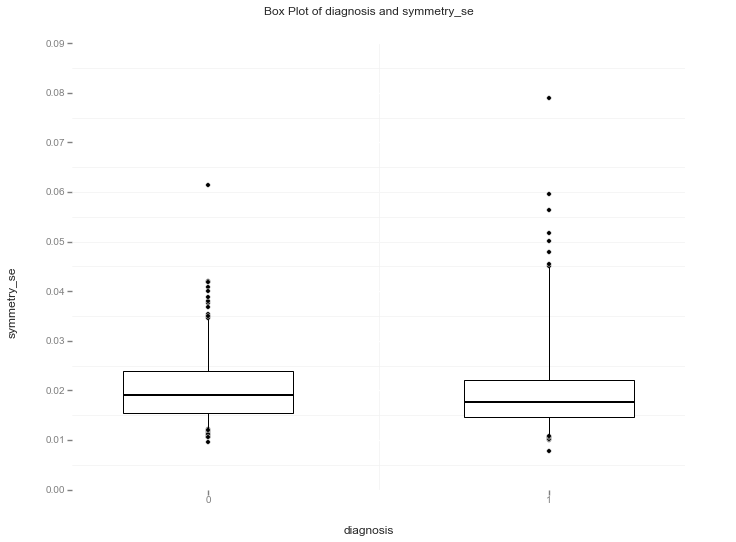

<ggplot: (13244336)>


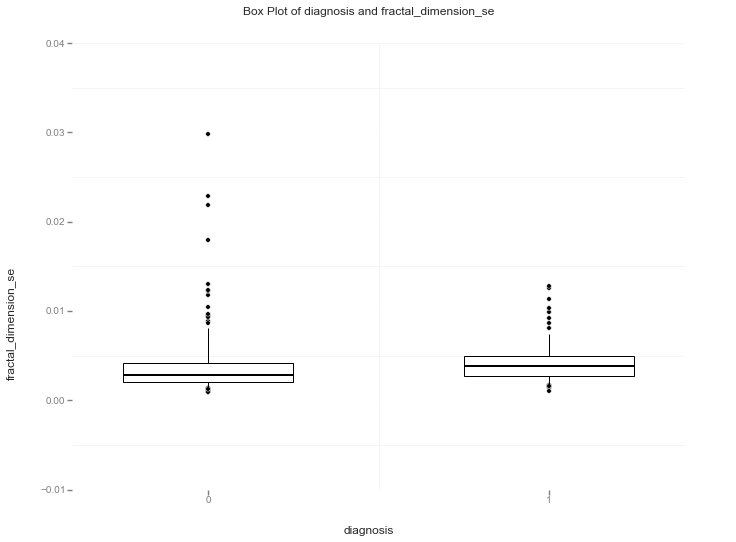

<ggplot: (17313252)>


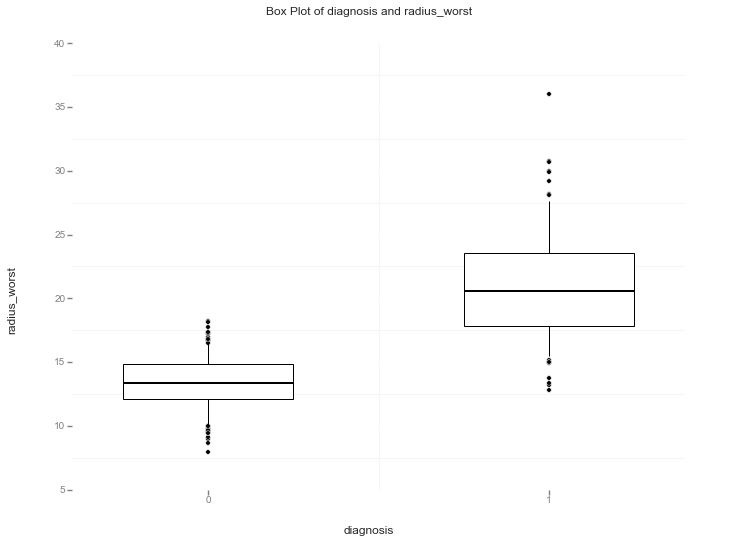

<ggplot: (13191565)>


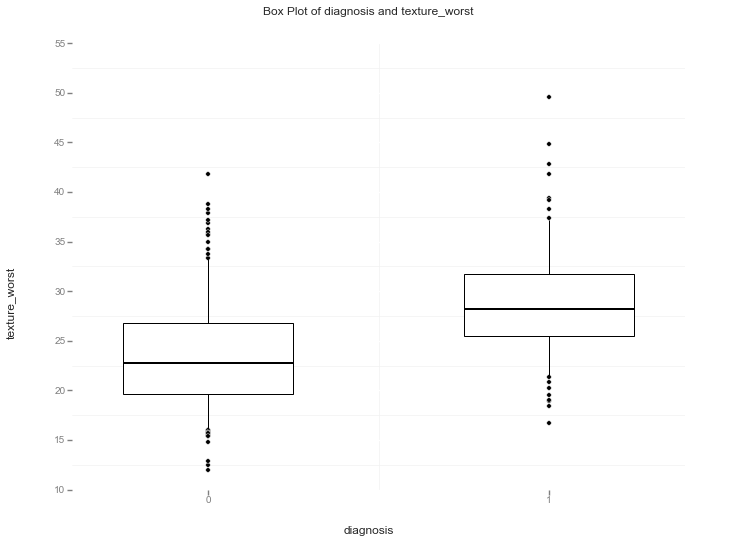

<ggplot: (13191659)>


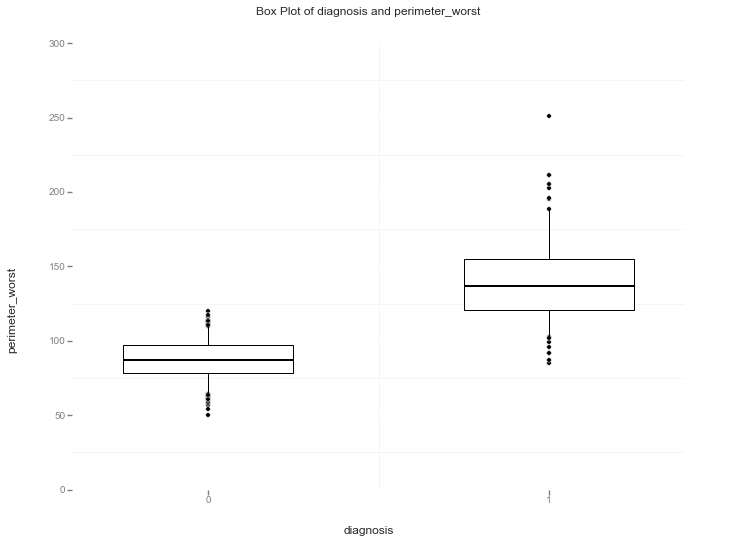

<ggplot: (15665728)>


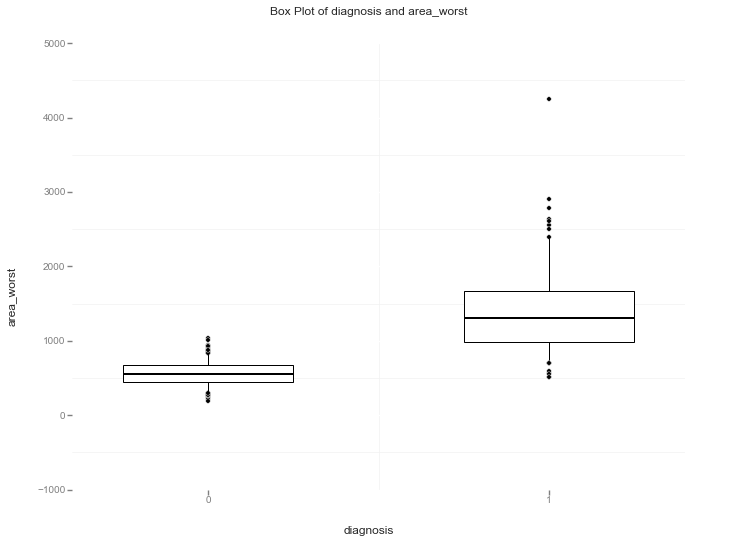

<ggplot: (17484818)>


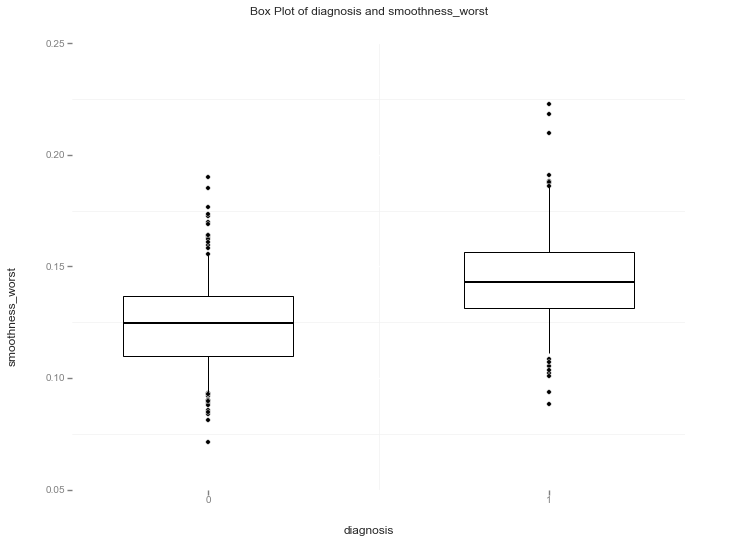

<ggplot: (15112880)>


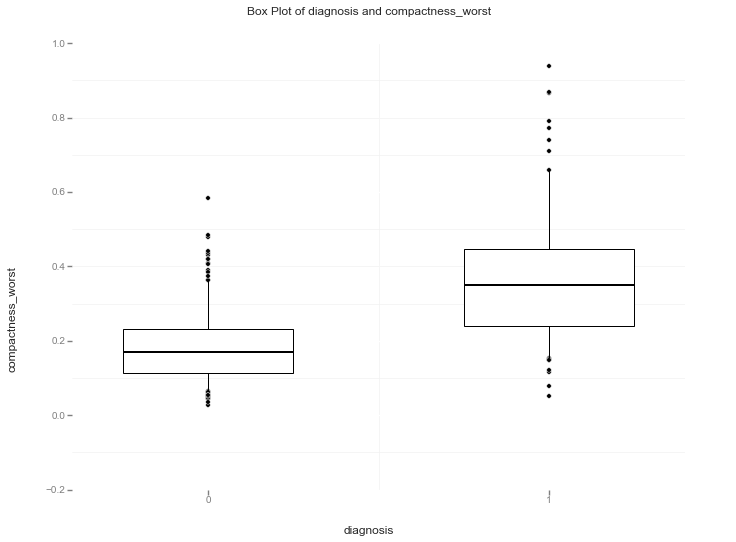

<ggplot: (13242902)>


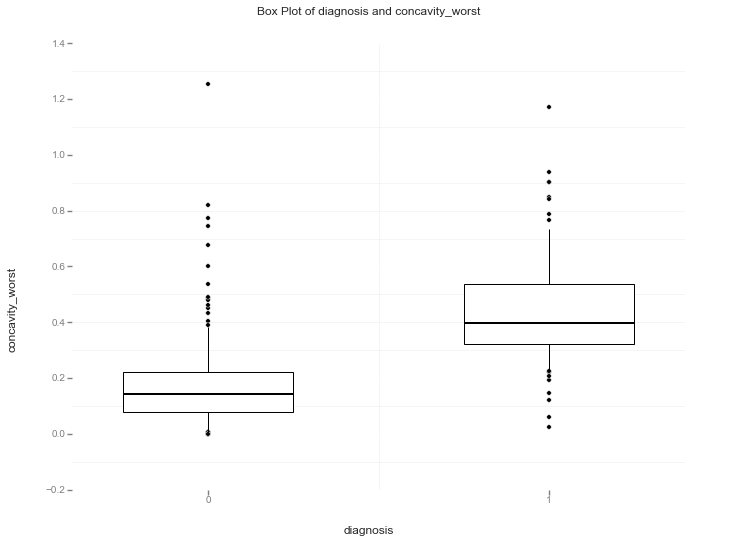

<ggplot: (17821739)>


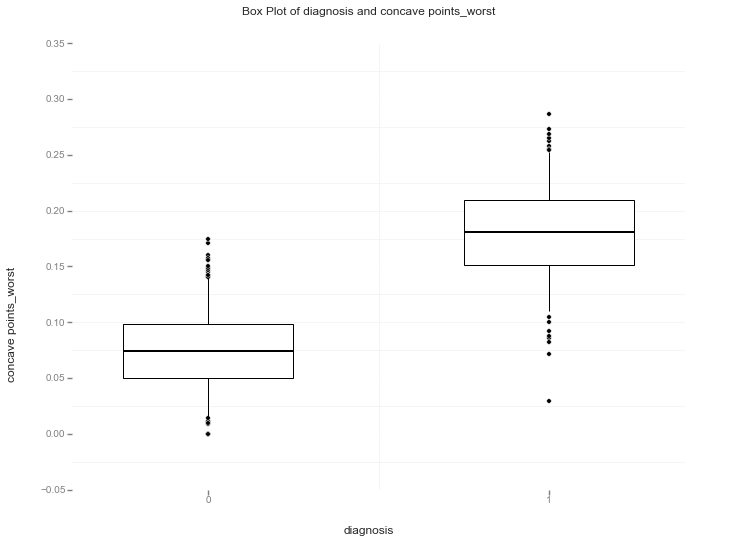

<ggplot: (17574828)>


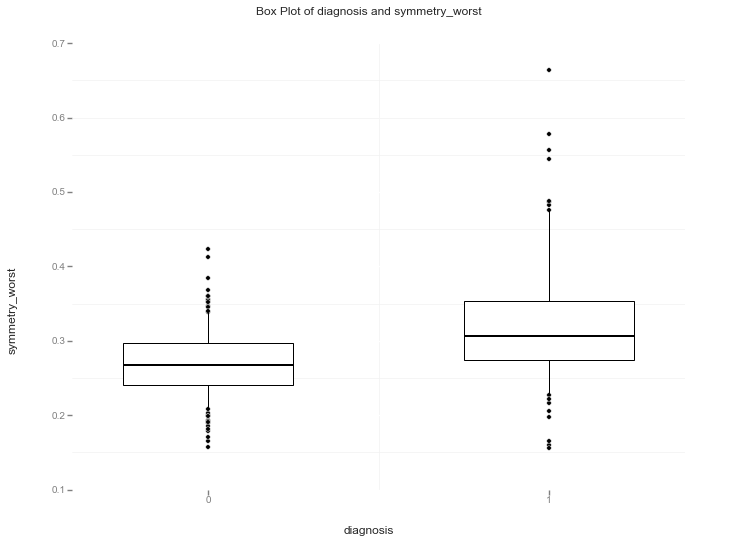

<ggplot: (17414113)>


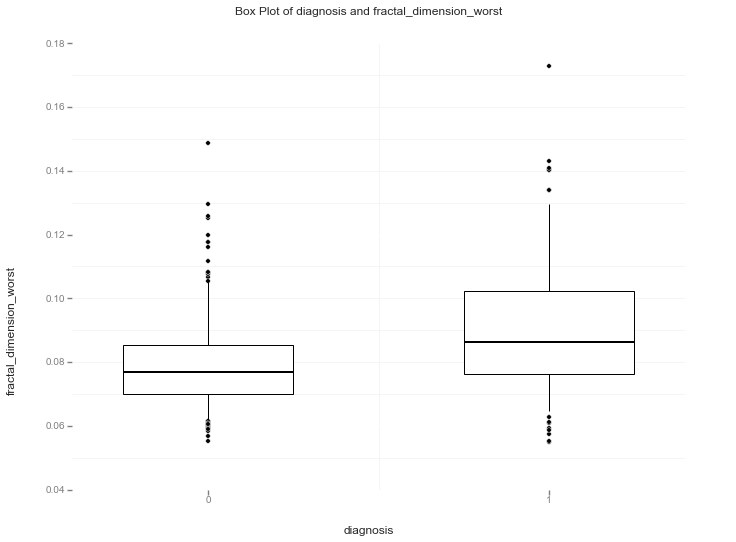

<ggplot: (17737364)>


In [80]:
for i in range(1,len(con)):
    g= ggplot(con_variables,aes(x= 'diagnosis',y=con[i])) + geom_boxplot() + ggtitle('Box Plot of diagnosis and '+con[i])+theme_bw()
    print(g)

In [81]:
Cor = con_variables.iloc[:,1:len(con)]
Cor_matrxi = Cor.corr(method='pearson', min_periods=1)
print(Cor_matrxi)

                         radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.330690        0.997764   0.986799   
texture_mean                0.330690      1.000000        0.337979   0.330553   
perimeter_mean              0.997764      0.337979        1.000000   0.986399   
area_mean                   0.986799      0.330553        0.986399   1.000000   
smoothness_mean             0.195751      0.024258        0.231972   0.207795   
compactness_mean            0.504173      0.260129        0.556381   0.501620   
concavity_mean              0.665075      0.327695        0.705702   0.681577   
concave points_mean         0.820136      0.323089        0.848880   0.823277   
symmetry_mean               0.144129      0.095592        0.180036   0.151845   
fractal_dimension_mean     -0.298762     -0.051351       -0.246583  -0.265050   
radius_se                   0.661160      0.276448        0.675037   0.725649   
texture_se                 -

(array([  1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,   9.5,
         10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,  18.5,
         19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,  27.5,
         28.5,  29.5,  30.5]), <a list of 30 Text xticklabel objects>)

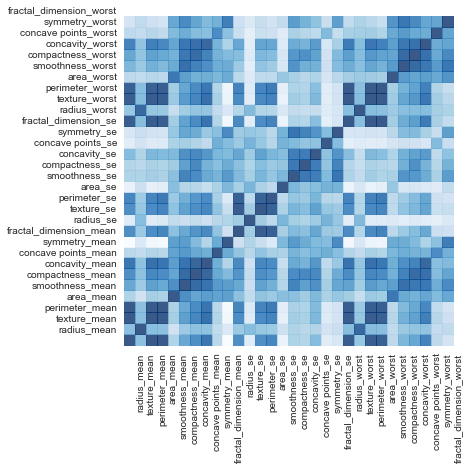

In [83]:
fig, ax = plt.subplots()
heatmap = ax.pcolor(Cor_matrxi, cmap=plt.cm.Blues, alpha=0.8)
fig = plt.gcf()
fig.set_size_inches(6, 6)
ax.set_frame_on(False)
ax.set_yticks(np.arange(1,len(con)) + 0.5, minor=False)
ax.set_xticks(np.arange(1,len(con)) + 0.5, minor=False)
ax.set_xticklabels(con[1:(len(con))], minor=False)
ax.set_yticklabels(con[1:(len(con))], minor=False)
plt.xticks(rotation=90)

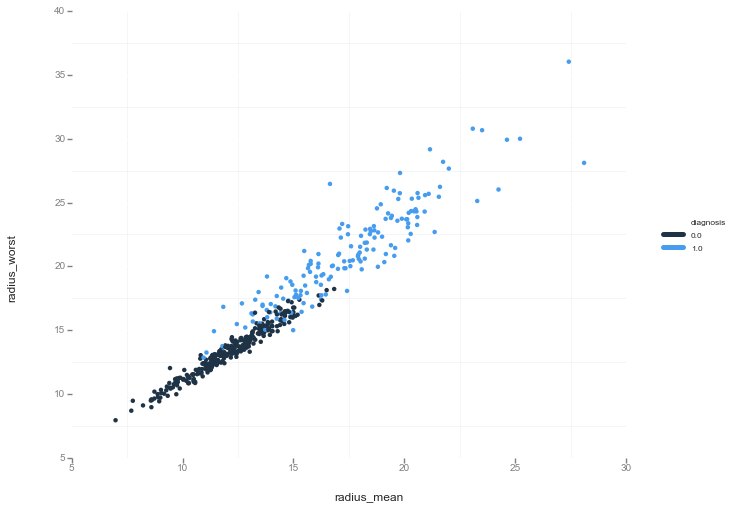

<ggplot: (17192347)>


In [128]:
g = ggplot(con_variables, aes(x='radius_mean',y='radius_worst',color='diagnosis'))+geom_point() +theme_bw()
print (g)

<h2>Feature Selection</h2>

In [143]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

features = train.iloc[:,1:len(con)]
test_features = test.iloc[:,1:len(con)]

label = train['diagnosis']
clf = ExtraTreesClassifier()
clf = clf.fit(features, label)
model = SelectFromModel(clf, prefit=True)
New_features = model.transform(features)

#print features
print(features.shape)
print(New_features.shape)

(455, 30)
(455L, 7L)


<h2>Model Fit</h2>

In [144]:
train_features = features
test_features = test_features

train_features = New_features
test_features = model.transform(test_features)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
Classifiers = [DecisionTreeClassifier(),LogisticRegression(C=0.000000001,solver='liblinear',max_iter=100),RandomForestClassifier(n_estimators=100)]


In [145]:
from sklearn.metrics import accuracy_score
Model = []
Accuracy = []
for clf in Classifiers:
    fit=clf.fit(train_features,label)
    pred=fit.predict(test_features)
    Model.append(clf.__class__.__name__)
    Accuracy.append(accuracy_score(test['diagnosis'],pred))
    print('Accuracy of '+clf.__class__.__name__ +' is '+str(accuracy_score(test['diagnosis'],pred)))

Accuracy of DecisionTreeClassifier is 1.0
Accuracy of LogisticRegression is 0.552631578947
Accuracy of RandomForestClassifier is 1.0


In [146]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test['diagnosis'],pred)

array([[63,  0],
       [ 0, 51]])

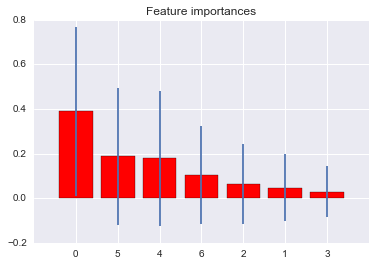

In [147]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_features.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(train_features.shape[1]), indices)
plt.xlim([-1, train_features.shape[1]])
plt.show()